In [2]:
import numpy as np 
import pandas as pd

In [4]:
df = pd.read_csv('iris.csv')

In [6]:
df.head()

,Id,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm,Species
0,1,5.1,3.5,1.4,0.2,Iris-setosa
1,2,4.9,3.0,1.4,0.2,Iris-setosa
2,3,4.7,3.2,1.3,0.2,Iris-setosa
3,4,4.6,3.1,1.5,0.2,Iris-setosa
4,5,5.0,3.6,1.4,0.2,Iris-setosa


In [8]:
df = df.iloc[:,1:]

In [10]:
df.head()

,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm,Species
0,5.1,3.5,1.4,0.2,Iris-setosa
1,4.9,3.0,1.4,0.2,Iris-setosa
2,4.7,3.2,1.3,0.2,Iris-setosa
3,4.6,3.1,1.5,0.2,Iris-setosa
4,5.0,3.6,1.4,0.2,Iris-setosa


In [12]:
from sklearn.preprocessing import LabelEncoder
encoder = LabelEncoder()

In [14]:
df['Species'] = encoder.fit_transform(df['Species'])

In [16]:
df.head()

,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm,Species
0,5.1,3.5,1.4,0.2,0
1,4.9,3.0,1.4,0.2,0
2,4.7,3.2,1.3,0.2,0
3,4.6,3.1,1.5,0.2,0
4,5.0,3.6,1.4,0.2,0


In [18]:
df = df[df['Species'] != 0][['SepalWidthCm','PetalLengthCm','Species']]

In [20]:
df.head()

,SepalWidthCm,PetalLengthCm,Species
50,3.2,4.7,1
51,3.2,4.5,1
52,3.1,4.9,1
53,2.3,4.0,1
54,2.8,4.6,1


In [22]:
import seaborn as sns
import matplotlib.pyplot as plt

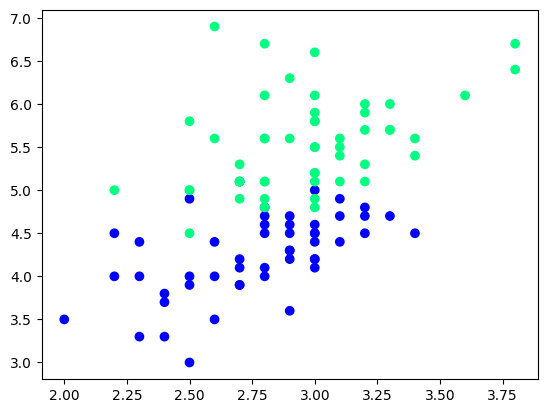

In [24]:
plt.scatter(df['SepalWidthCm'],df['PetalLengthCm'],c=df['Species'],cmap='winter')

In [26]:
df_train = df.iloc[:60,:].sample(10)
df_train

,SepalWidthCm,PetalLengthCm,Species
74,2.9,4.3,1
104,3.0,5.8,2
53,2.3,4.0,1
55,2.8,4.5,1
101,2.7,5.1,2
62,2.2,4.0,1
65,3.1,4.4,1
93,2.3,3.3,1
50,3.2,4.7,1
95,3.0,4.2,1


In [28]:
# Taking only 10 rows for training
df = df.sample(100)
df_train = df.iloc[:60,:].sample(10)
df_val = df.iloc[60:80,:].sample(5)
df_test = df.iloc[80:,:].sample(5)

In [30]:
df_train

,SepalWidthCm,PetalLengthCm,Species
107,2.9,6.3,2
102,3.0,5.9,2
101,2.7,5.1,2
149,3.0,5.1,2
76,2.8,4.8,1
123,2.7,4.9,2
142,2.7,5.1,2
117,3.8,6.7,2
71,2.8,4.0,1
143,3.2,5.9,2


In [32]:
df_val

,SepalWidthCm,PetalLengthCm,Species
60,2.0,3.5,1
138,3.0,4.8,2
114,2.8,5.1,2
99,2.8,4.1,1
126,2.8,4.8,2


In [34]:
df_test

,SepalWidthCm,PetalLengthCm,Species
106,2.5,4.5,2
51,3.2,4.5,1
119,2.2,5.0,2
94,2.7,4.2,1
141,3.1,5.1,2


In [36]:
X_test = df_val.iloc[:,0:2].values
y_test = df_val.iloc[:,-1].values

In [38]:
y_test

array([1, 2, 2, 1, 2])

In [40]:
#Case 1 - Bagging

# Data for Tree 1
df_bag = df_train.sample(8,replace=True)

X = df_bag.iloc[:,0:2]
y = df_bag.iloc[:,-1]

df_bag

,SepalWidthCm,PetalLengthCm,Species
117,3.8,6.7,2
107,2.9,6.3,2
123,2.7,4.9,2
101,2.7,5.1,2
143,3.2,5.9,2
76,2.8,4.8,1
107,2.9,6.3,2
142,2.7,5.1,2


In [54]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.tree import plot_tree
from mlxtend.plotting import plot_decision_regions
from sklearn.metrics import accuracy_score

def evaluate(clf,X,y):
    clf.fit(X,y)
    plot_tree(clf)
    plt.show()
    plot_decision_regions(X.values, y.values, clf=clf, legend=2)
    y_pred = clf.predict(X_test)
    print(accuracy_score(y_test,y_pred))

In [56]:
dt_bag1 = DecisionTreeClassifier()

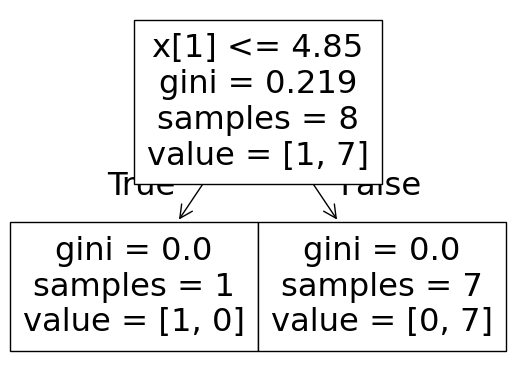

0.6


C:\Users\debsa\anaconda3\Lib\site-packages\sklearn\base.py:493: UserWarning: X does not have valid feature names, but DecisionTreeClassifier was fitted with feature names
  warnings.warn(
C:\Users\debsa\anaconda3\Lib\site-packages\sklearn\base.py:493: UserWarning: X does not have valid feature names, but DecisionTreeClassifier was fitted with feature names
  warnings.warn(


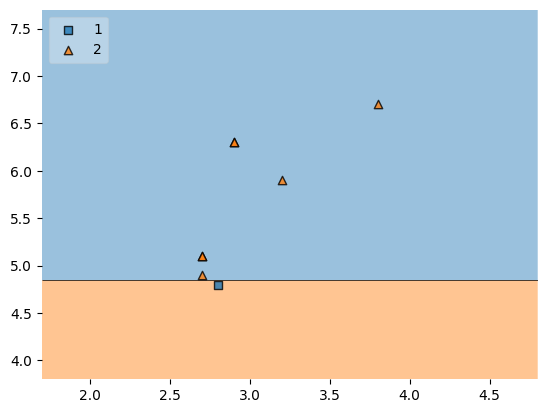

In [58]:
evaluate(dt_bag1,X,y)

In [66]:
# Data for Tree 1
df_bag = df_train.sample(8,replace=True)

# Fetch X and y
X = df_bag.iloc[:,0:2]
y = df_bag.iloc[:,-1]

# print df_bag
df_bag

,SepalWidthCm,PetalLengthCm,Species
123,2.7,4.9,2
143,3.2,5.9,2
149,3.0,5.1,2
102,3.0,5.9,2
143,3.2,5.9,2
142,2.7,5.1,2
149,3.0,5.1,2
71,2.8,4.0,1


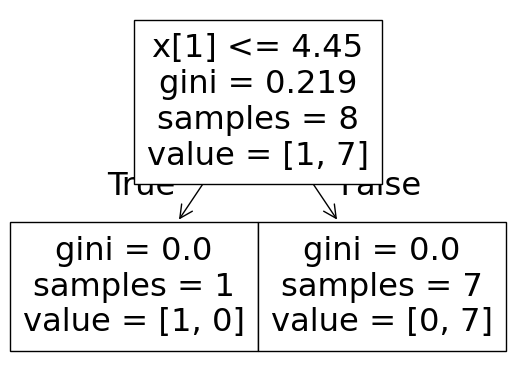

1.0


C:\Users\debsa\anaconda3\Lib\site-packages\sklearn\base.py:493: UserWarning: X does not have valid feature names, but DecisionTreeClassifier was fitted with feature names
  warnings.warn(
C:\Users\debsa\anaconda3\Lib\site-packages\sklearn\base.py:493: UserWarning: X does not have valid feature names, but DecisionTreeClassifier was fitted with feature names
  warnings.warn(


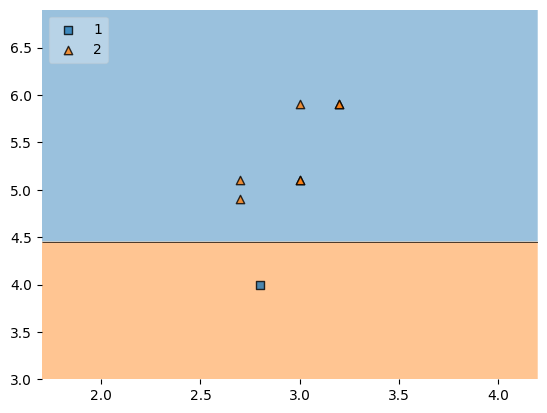

In [68]:
dt_bag2 = DecisionTreeClassifier()
evaluate(dt_bag2,X,y)

In [70]:
# Data for Tree 1
df_bag = df_train.sample(8,replace=True)

# Fetch X and y
X = df_bag.iloc[:,0:2]
y = df_bag.iloc[:,-1]

# print df_bag
df_bag

,SepalWidthCm,PetalLengthCm,Species
117,3.8,6.7,2
71,2.8,4.0,1
117,3.8,6.7,2
117,3.8,6.7,2
102,3.0,5.9,2
102,3.0,5.9,2
107,2.9,6.3,2
117,3.8,6.7,2


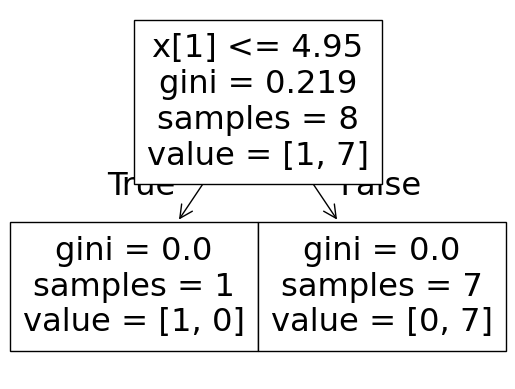

0.6


C:\Users\debsa\anaconda3\Lib\site-packages\sklearn\base.py:493: UserWarning: X does not have valid feature names, but DecisionTreeClassifier was fitted with feature names
  warnings.warn(
C:\Users\debsa\anaconda3\Lib\site-packages\sklearn\base.py:493: UserWarning: X does not have valid feature names, but DecisionTreeClassifier was fitted with feature names
  warnings.warn(


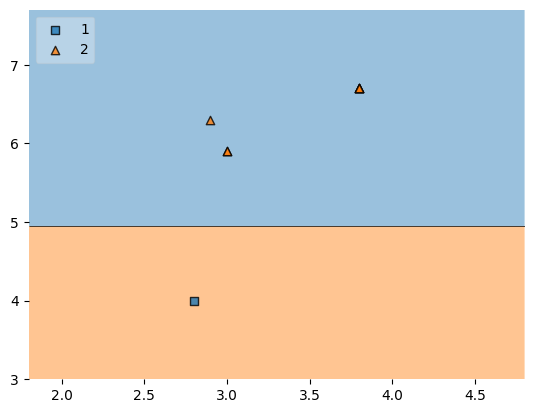

In [72]:
dt_bag3 = DecisionTreeClassifier()
evaluate(dt_bag3,X,y)

In [88]:
#Predict (Aggregation)
df_test

,SepalWidthCm,PetalLengthCm,Species
106,2.5,4.5,2
51,3.2,4.5,1
119,2.2,5.0,2
94,2.7,4.2,1
141,3.1,5.1,2


In [76]:
print("Predictor 1",dt_bag1.predict(np.array([2.2,5.0]).reshape(1,2)))
print("Predictor 2",dt_bag2.predict(np.array([2.2,5.0]).reshape(1,2)))
print("Predictor 3",dt_bag3.predict(np.array([2.2,5.0]).reshape(1,2)))

Predictor 1 [2]
Predictor 2 [2]
Predictor 3 [2]


C:\Users\debsa\anaconda3\Lib\site-packages\sklearn\base.py:493: UserWarning: X does not have valid feature names, but DecisionTreeClassifier was fitted with feature names
  warnings.warn(
C:\Users\debsa\anaconda3\Lib\site-packages\sklearn\base.py:493: UserWarning: X does not have valid feature names, but DecisionTreeClassifier was fitted with feature names
  warnings.warn(
C:\Users\debsa\anaconda3\Lib\site-packages\sklearn\base.py:493: UserWarning: X does not have valid feature names, but DecisionTreeClassifier was fitted with feature names
  warnings.warn(


In [78]:
#Pasting
# Row sampling without replacement
df_train

,SepalWidthCm,PetalLengthCm,Species
107,2.9,6.3,2
102,3.0,5.9,2
101,2.7,5.1,2
149,3.0,5.1,2
76,2.8,4.8,1
123,2.7,4.9,2
142,2.7,5.1,2
117,3.8,6.7,2
71,2.8,4.0,1
143,3.2,5.9,2


In [80]:
df_train.sample(8)

,SepalWidthCm,PetalLengthCm,Species
117,3.8,6.7,2
149,3.0,5.1,2
102,3.0,5.9,2
107,2.9,6.3,2
143,3.2,5.9,2
123,2.7,4.9,2
101,2.7,5.1,2
76,2.8,4.8,1


In [82]:
#Random Subspaces
df1 = pd.read_csv('iris.csv')
df1 = df1.sample(10)

In [84]:
df1

,Id,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm,Species
31,32,5.4,3.4,1.5,0.4,Iris-setosa
58,59,6.6,2.9,4.6,1.3,Iris-versicolor
19,20,5.1,3.8,1.5,0.3,Iris-setosa
107,108,7.3,2.9,6.3,1.8,Iris-virginica
140,141,6.7,3.1,5.6,2.4,Iris-virginica
115,116,6.4,3.2,5.3,2.3,Iris-virginica
44,45,5.1,3.8,1.9,0.4,Iris-setosa
81,82,5.5,2.4,3.7,1.0,Iris-versicolor
76,77,6.8,2.8,4.8,1.4,Iris-versicolor
99,100,5.7,2.8,4.1,1.3,Iris-versicolor


In [86]:
df1.sample(2,replace=True,axis=1)

,SepalLengthCm,Id
31,5.4,32
58,6.6,59
19,5.1,20
107,7.3,108
140,6.7,141
115,6.4,116
44,5.1,45
81,5.5,82
76,6.8,77
99,5.7,100


In [90]:
#Random Patches

In [92]:
df1

,Id,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm,Species
31,32,5.4,3.4,1.5,0.4,Iris-setosa
58,59,6.6,2.9,4.6,1.3,Iris-versicolor
19,20,5.1,3.8,1.5,0.3,Iris-setosa
107,108,7.3,2.9,6.3,1.8,Iris-virginica
140,141,6.7,3.1,5.6,2.4,Iris-virginica
115,116,6.4,3.2,5.3,2.3,Iris-virginica
44,45,5.1,3.8,1.9,0.4,Iris-setosa
81,82,5.5,2.4,3.7,1.0,Iris-versicolor
76,77,6.8,2.8,4.8,1.4,Iris-versicolor
99,100,5.7,2.8,4.1,1.3,Iris-versicolor


In [94]:
df1.sample(8,replace=True).sample(2,replace=True,axis=1)

,Id,SepalWidthCm
31,32,3.4
58,59,2.9
140,141,3.1
58,59,2.9
19,20,3.8
107,108,2.9
81,82,2.4
19,20,3.8
